In [16]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mt
from scipy import signal


<StemContainer object of 3 artists>

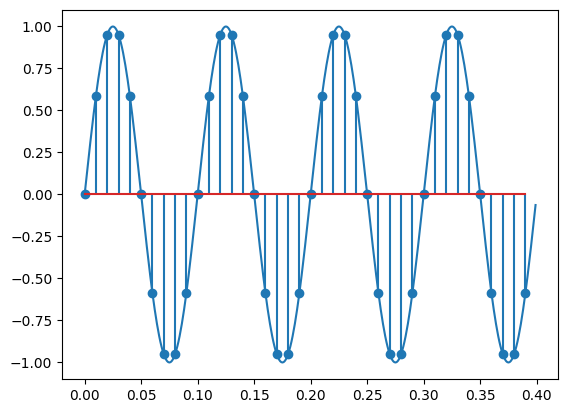

In [17]:
fm=10
tm=1/fm
t=np.arange(0,4*tm,0.01*tm)
xt=np.sin(2*np.pi*t*fm)
plt.plot(t,xt)
ts=np.arange(0,4*tm,0.1*tm)
xst=np.sin(2*np.pi*ts*fm)
plt.stem(ts,xst)

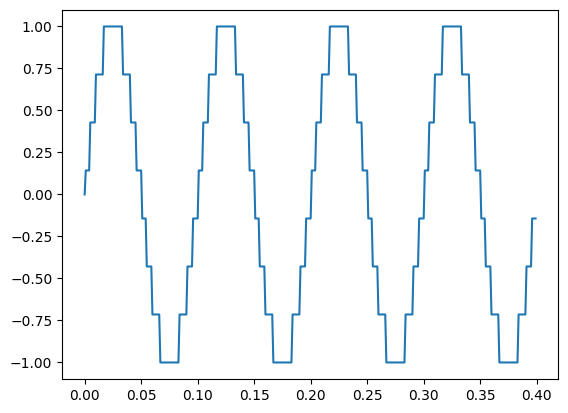

In [18]:
level=8
n=int(np.log2(level))
step_size=2/(level-1)
Xq=[]
for i in (xt):
    Xq.append(((mt.floor(i/step_size)+mt.ceil(i/step_size))/2)*step_size)


plt.plot(t,Xq)
# plt.plot(t,xt,'r')




In [19]:
quantize_signal=pd.DataFrame({'levels':Xq})
quantize_signal=quantize_signal.drop_duplicates().reset_index(drop=True)
quantize_signal=quantize_signal.drop(0)

quantize_signal

quantize_value=np.array(quantize_signal.levels[i+1] for i in range(level))

In [20]:
X8 = []
for i in range(level):
    num = bin(i).lstrip('0b').zfill(n)
    arr1 = []
    for j in (num):
        arr1.append(int(j))  
    X8.append(arr1)

X8

# print(len(quantize_value))
quantize_value

array(<generator object <genexpr> at 0x0000022A62429E00>, dtype=object)

In [21]:

table=pd.DataFrame({'quantization level': quantize_value.tolist(), 'Binary Representation': np.array(X8).tolist()})
table

,quantization level,Binary Representation
0,0.142857,"[0, 0, 0]"
1,0.428571,"[0, 0, 1]"
2,0.714286,"[0, 1, 0]"
3,1.000000,"[0, 1, 1]"
4,-0.142857,"[1, 0, 0]"
5,-0.428571,"[1, 0, 1]"
6,-0.714286,"[1, 1, 0]"
7,-1.000000,"[1, 1, 1]"


In [22]:
pcm=[]
for i in Xq:
    for index ,level in table.iterrows():
        if i==level['quantization level']:
            pcm.extend(level['Binary Representation'])





<StemContainer object of 3 artists>

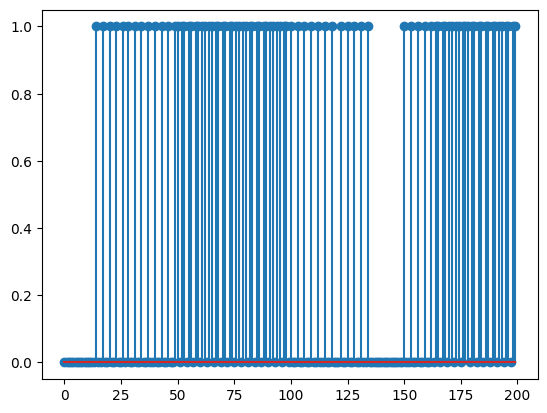

In [23]:
plt.stem(pcm[0:200])

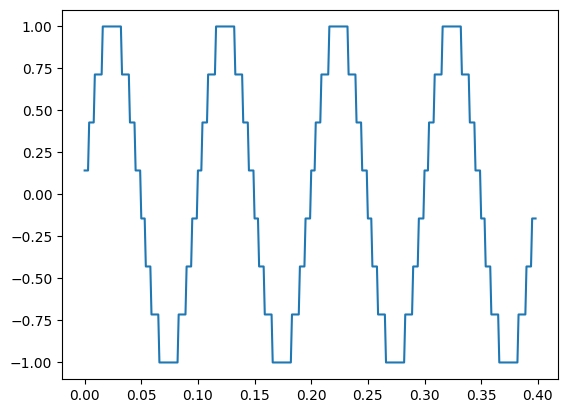

In [24]:

xr=[]
for i in range(0,len(pcm),n):
    v=pcm[i:i+n]
    pres_level=  table.loc[table['Binary Representation'].apply(lambda x:x==v),'quantization level'].values[0]
    xr.append(pres_level)

t1=np.delete(t,-1)
plt.plot(t1,xr)

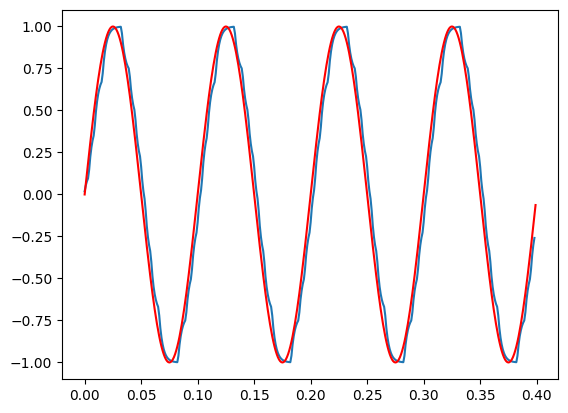

In [25]:
b,a=signal.butter(1,0.1)
yt=signal.lfilter(b,a,xr)

plt.plot(t1,yt)
plt.plot(t,xt,'r')